In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


滞后回归变量用于将其他观察到的变量与我们的目标时间序列相关联。例如，前几天的温度可能是第二天温度的良好预测指标。

加载一个新数据集，其中也包含温度。

In [2]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial04.csv")
df.head()

,ds,y,temperature
0,2015-01-01,64.92,277.00
1,2015-01-02,58.46,277.95
2,2015-01-03,63.35,278.83
3,2015-01-04,50.54,279.64
4,2015-01-05,64.89,279.05


将其转化为摄氏度

In [3]:
df["temperature"] = (df["temperature"] - 273.15) * 1.8 + 32

绘制温度和y的相关曲线

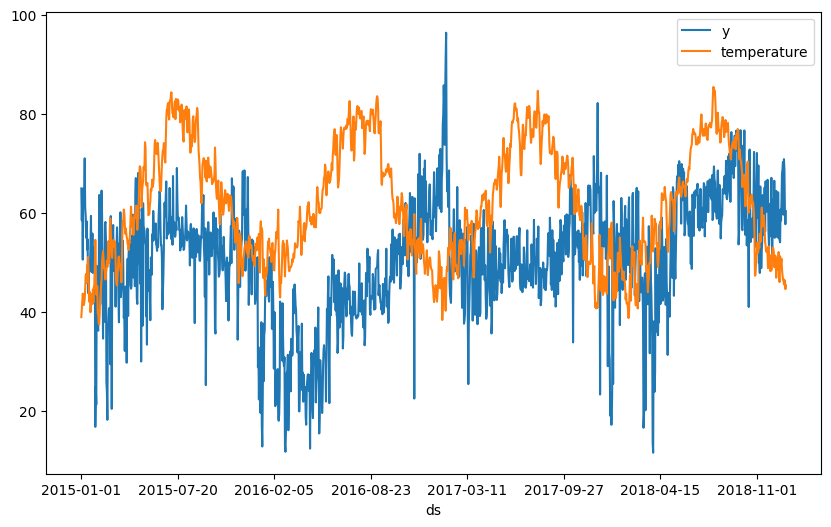

In [4]:
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

从数据中我们可以看到，电价与温度之间存在弱反比关系。我们从上一个教程中的模型开始，然后将温度作为滞后回归添加到我们的模型中。

In [5]:
# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_lags=10,  # Autogression
)
m.set_plotting_backend("plotly-static")

# Add temperature of last three days as lagged regressor
m.add_lagged_regressor("temperature", n_lags=3)

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

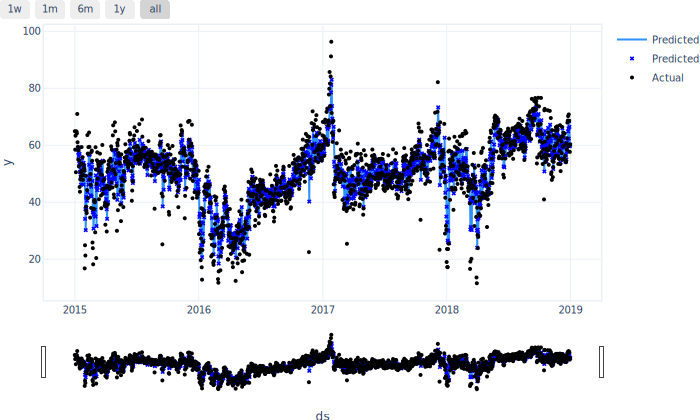

In [6]:
# set plotting to focus on forecasting horizon 1 (the only one for us here)
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

绘制成分分解图  趋势、季节性等因素是如何随时间变化并影响预测的

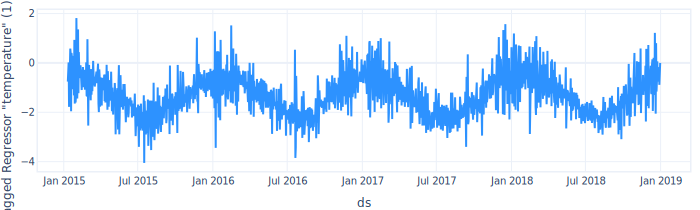

In [7]:
# show the component's forecast contribution
m.plot_components(forecast, components=["lagged_regressors"])

我们看到温度对预测价格的影响只有几个单位。与整体价格波动相比，温度影响似乎很小，但并非微不足道。

绘制参数系数图  模型认为哪些特征最重要​？其影响程度（系数）有多大

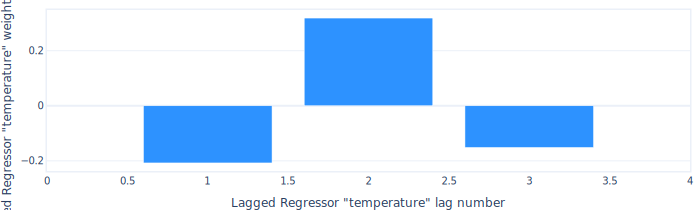

In [8]:
m.plot_parameters(components=["lagged_regressors"])

In [11]:
metrics.tail(1)

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
99,0.016863,0.0,4.914755,6.580037,0.017,0.0,99


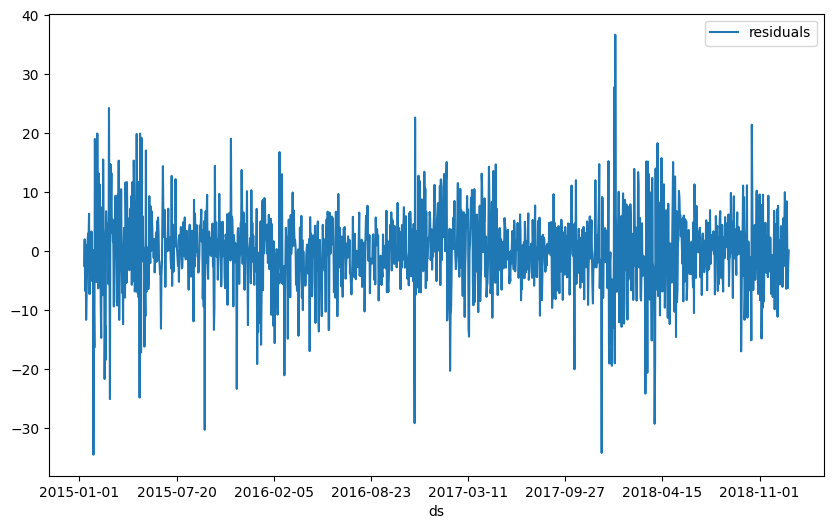

In [12]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))